In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import *
from yellowbrick.cluster import KElbowVisualizer

In [24]:
df = pd.read_csv("../csv/preprocessed/features_model.csv")
df.head()

,PageId,Frequency,Timeinterval-avg,Timeinterval-std,Size-avg
0,0,104,104.177744,599.385970,512.000000
1,1,178,61.051303,417.857584,512.000000
2,2,128,84.295964,540.087874,512.000000
3,3,138,78.143073,413.777300,537.971014
4,4,129,83.637812,535.740946,539.782946


In [25]:
page_ids = df['PageId']
df = df[['Frequency', 'Timeinterval-avg','Timeinterval-std', 'Size-avg']]
df.head()

,Frequency,Timeinterval-avg,Timeinterval-std,Size-avg
0,104,104.177744,599.385970,512.000000
1,178,61.051303,417.857584,512.000000
2,128,84.295964,540.087874,512.000000
3,138,78.143073,413.777300,537.971014
4,129,83.637812,535.740946,539.782946


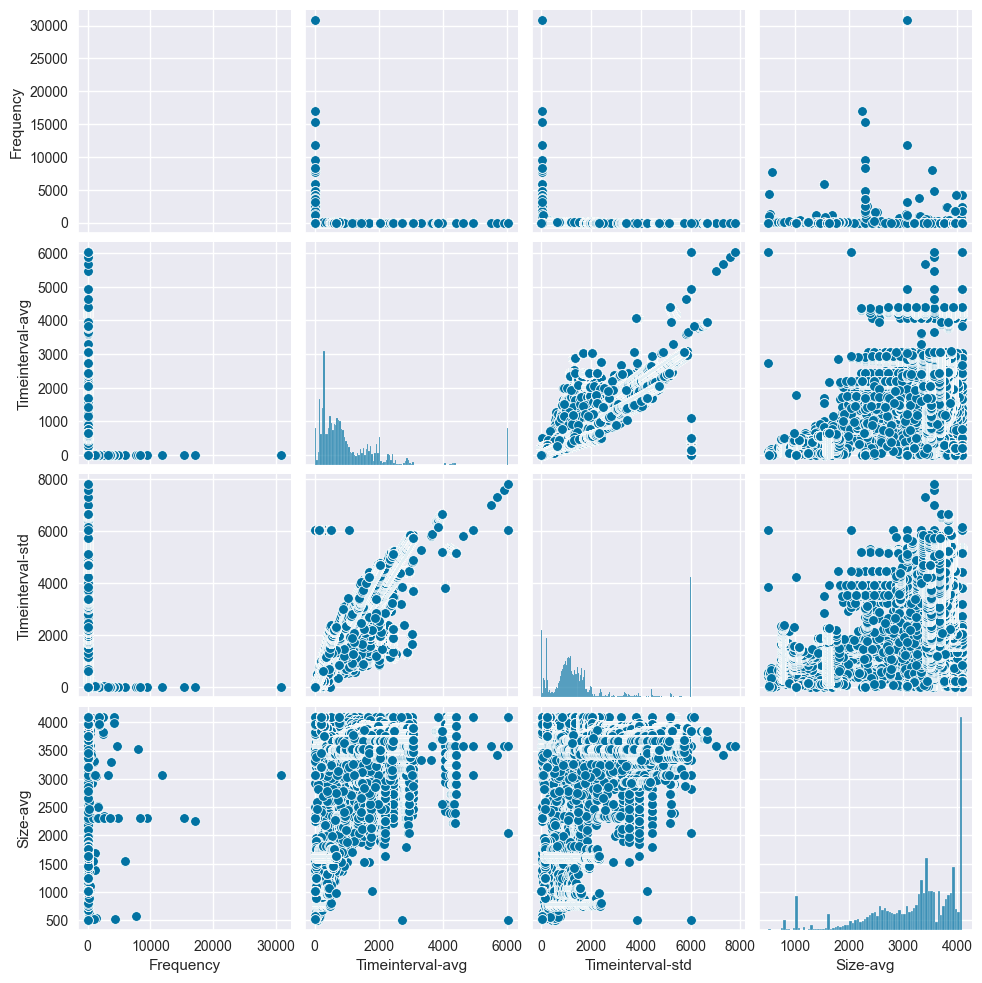

In [26]:
sns.pairplot(df)
plt.show()

In [27]:
N_INIT = 200
RANDOM_STATE = 42

In [29]:
def draw_elbow_graph(data):
    model = KMeans(random_state=RANDOM_STATE, n_init=N_INIT)
    visualizer = KElbowVisualizer(model, k=(1, 8))
    visualizer.fit(data)
    visualizer.show()

    return visualizer.elbow_value_

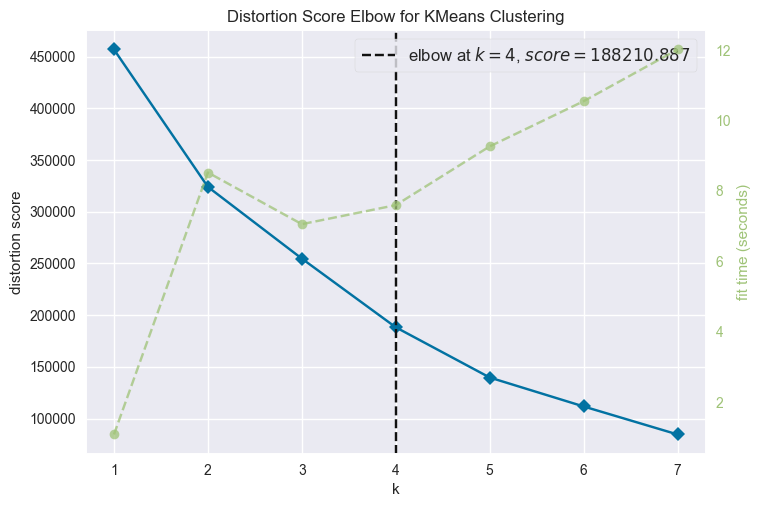

In [28]:
# StandardScaler를 활용한 데이터 정규화

standard_scaler = StandardScaler()
data_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df), columns = df.columns)
standard_scaler_k = draw_elbow_graph(data_standard_scaled)

In [46]:
# PCA를 사용하여 4차원 -> 2차원으로 축소하여 분포 확인

def draw_pca_graph(data, plt_title, k):
    pca = PCA(n_components=2, random_state=RANDOM_STATE) # n_compoents: 2차원
    X_2d = pca.fit_transform(data)

    kmeans = KMeans(n_clusters=k, n_init=N_INIT, random_state=RANDOM_STATE)
    kmeans.fit(X_2d)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    unique_labels = np.unique(labels)

    for label in unique_labels:
        plt.scatter(X_2d[labels == label, 0], X_2d[labels == label, 1], label=f'Cluster {label}')

    # 중심점 찍기
    plt.scatter(centers[:,0], centers[:,1], marker='*', c='red', label='centroids')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(scatterpoints=1)
    plt.title(plt_title)
    plt.show()

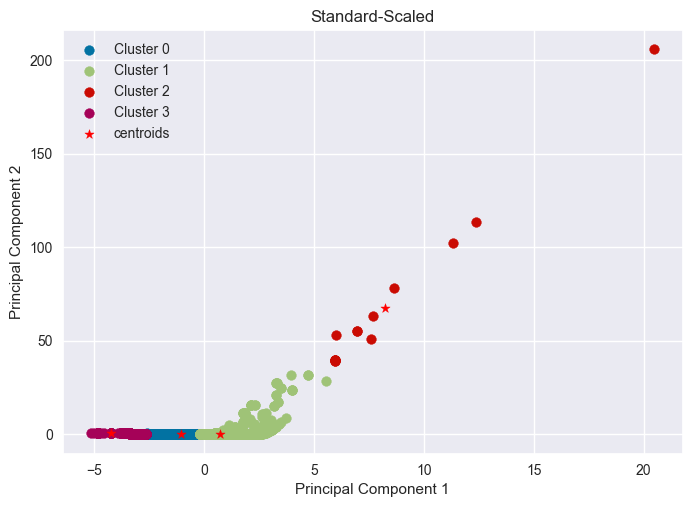

In [47]:
draw_pca_graph(data_standard_scaled, "Standard-Scaled", standard_scaler_k)

In [ ]:
# 위의 그래프는 2차원으로 축소하고, 군집화를 진행하여 분포를 시각적으로 확인한 것이므로, 새로 4차원으로 군집화를 수행해야 한다.

In [48]:
model = KMeans(n_clusters=standard_scaler_k, n_init=N_INIT, random_state=RANDOM_STATE)
model.fit(data_standard_scaled)
df['Cluster'] = model.predict(data_standard_scaled)

In [53]:
df[df['Cluster'] == 0].head(10)

,Frequency,Timeinterval-avg,Timeinterval-std,Size-avg,Cluster
17,6,2385.969067,2937.106799,2816.0,0
139,4,2773.199585,2403.712900,3840.0,0
140,4,2773.225627,2403.747447,3840.0,0
142,4,2773.302124,2403.919619,3840.0,0
144,4,2773.348023,2404.007548,3840.0,0
159,4,2773.254272,2404.915512,4096.0,0
161,4,2773.273804,2404.968748,4096.0,0
163,4,2773.315145,2405.000087,3968.0,0
164,4,2773.332723,2405.010565,3840.0,0
165,4,2773.339396,2405.039651,3968.0,0


In [54]:
df[df['Cluster'] == 1].head(10)

,Frequency,Timeinterval-avg,Timeinterval-std,Size-avg,Cluster
0,104,104.177744,599.385970,512.000000,1
1,178,61.051303,417.857584,512.000000,1
2,128,84.295964,540.087874,512.000000,1
3,138,78.143073,413.777300,537.971014,1
4,129,83.637812,535.740946,539.782946,1
5,140,77.018944,514.446256,537.600000,1
6,112,96.445667,555.652816,544.000000,1
7,65,167.096424,754.064401,567.138462,1
8,85,127.733875,659.511543,554.164706,1
9,144,74.858106,455.620775,760.888889,1


In [55]:
df[df['Cluster'] == 2].head(10)

,Frequency,Timeinterval-avg,Timeinterval-std,Size-avg,Cluster
11,3,370.760071,494.332637,4096.0,2
12,5,199.994568,347.688264,3379.2,2
13,4,266.499959,393.437277,4096.0,2
14,4,266.499959,393.437277,4096.0,2
15,4,266.499959,393.437277,4096.0,2
16,4,266.499959,393.437277,4096.0,2
18,4,266.499959,393.393198,4096.0,2
19,4,266.499959,393.393198,3840.0,2
20,4,266.515259,393.375530,4096.0,2
21,5,199.886444,347.733801,3379.2,2


In [56]:
df[df['Cluster'] == 3].head(10)

,Frequency,Timeinterval-avg,Timeinterval-std,Size-avg,Cluster
3960,5941,2.360102,3.923239,1538.843966,3
3985,5920,2.367561,3.957989,1537.816216,3
4010,5938,2.360431,3.909648,1538.241832,3
18268,5947,2.357722,3.919669,1540.046410,3
18293,5925,2.365563,3.948352,1539.283713,3
18318,5948,2.356462,3.907620,1540.131809,3
30105,11785,1.189930,13.651362,3072.043445,3
46698,9480,1.301462,15.863143,2304.594093,3
87388,15333,0.804689,11.392352,2304.550968,3
87389,7668,1.609152,16.082204,571.492958,3


In [58]:
for i in range(4):
    print(f"Length of Cluster {i} : {len(df[df['Cluster'] == i])}")

Length of Cluster 0 : 18546
Length of Cluster 1 : 29742
Length of Cluster 2 : 65928
Length of Cluster 3 : 15


Cluster 0: 18546 rows (cold)
Cluster 1: 29742 rows (hot)
Cluster 2: 65928 rows (warm)
Cluster 3: 15 rows (hot)

위의 특성값 분포를 토대로, Cluster 0을 Cold, Cluster (1, 3)을 hot, Cluster 2를 Warm으로 결정했다.

In [59]:
df.loc[df['Cluster'] == 0, 'Cluster'] = 'Cold'
df.loc[df['Cluster'] == 1, 'Cluster'] = 'Hot'
df.loc[df['Cluster'] == 2, 'Cluster'] = 'Warm'
df.loc[df['Cluster'] == 3, 'Cluster'] = 'Hot'

In [61]:
df['Cluster'].value_counts()

Warm    65928
Hot     29757
Cold    18546
Name: Cluster, dtype: int64

In [64]:
df.to_csv("../csv/preprocessed/clustered_model.csv", index=False)